# Global Power Plant Database Prediction

## Problem Statement:

**Description**

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

**Key attributes of the database:**

The database includes the following indicators:

* **country (text):** 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
* **country_long (text):** longer form of the country designation
* **name (text):** name or title of the power plant, generally in Romanized form
* **gppd_idnr (text):** 10 or 12 character identifier for the power plant
* **capacity_mw (number):** electrical generating capacity in megawatts
* **latitude (number):** geolocation in decimal degrees; WGS84 (EPSG:4326)
* **longitude (number):**  geolocation in decimal degrees; WGS84 (EPSG:4326)
* **primary_fuel (text):** energy source used in primary electricity generation or export
* **other_fuel (text):** energy source used in electricity generation or export
* **other_fuel2 (text):** energy source used in electricity generation or export
* **other_fuel3 (text):** energy source used in electricity generation or export
* **commissioning_year (number):**  year of plant operation, weighted by unit-capacity when data is available
* **owner (text):** majority shareholder of the power plant, generally in Romanized form
* **source (text):** entity reporting the data; could be an organization, report, or document, generally in Romanized form
* **url (text):** web document corresponding to the source field
* **geolocation_source (text):** attribution for geolocation information
* **wepp_id (text):** a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
* **year_of_capacity_data (number):** year the capacity information was reported
* **generation_data_source (text):** attribution for the reported generation information
* **generation_gwh_2013 (number):** electricity generation in gigawatt-hours reported for the year 2013
* **generation_gwh_2014 (number):** electricity generation in gigawatt-hours reported for the year 2014
* **generation_gwh_2015 (number):** electricity generation in gigawatt-hours reported for the year 2015
* **generation_gwh_2016 (number):** electricity generation in gigawatt-hours reported for the year 2016
* **generation_gwh_2017 (number):** electricity generation in gigawatt-hours reported for the year 2017
* **generation_gwh_2018 (number):** electricity generation in gigawatt-hours reported for the year 2018
* **generation_gwh_2019 (number):** electricity generation in gigawatt-hours reported for the year 2019
* **estimated_generation_gwh_2013 (number):** estimated electricity generation in gigawatt-hours for the year 2013
* **estimated_generation_gwh_2014 (number):** estimated electricity generation in gigawatt-hours for the year 2014
* **estimated_generation_gwh_2015 (number):** estimated electricity generation in gigawatt-hours for the year 2015
* **estimated_generation_gwh_2016 (number):** estimated electricity generation in gigawatt-hours for the year 2016
* **estimated_generation_gwh_2017 (number):** estimated electricity generation in gigawatt-hours for the year 2017
* **estimated_generation_note_2013 (text):** label of the model/method used to estimate generation for the year 2013
* **estimated_generation_note_2014 (text):** label of the model/method used to estimate generation for the year 2014
* **estimated_generation_note_2015 (text):** label of the model/method used to estimate generation for the year 2015
* **estimated_generation_note_2016 (text):** label of the model/method used to estimate generation for the year 2016
* **estimated_generation_note_2017 (text):** label of the model/method used to estimate generation for the year 2017

**Fuel Type Aggregation**

We define the "Fuel Type" attribute of our database based on common fuel categories.

**Prediction:**

Make two prediction for labels

* **primary_fuel**
* **capacity_MW**

## Dataset Link-
- https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

### Importing Necessary Libraries

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
import joblib
from joblib import dump

# Classification

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Regression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

### Loading Dataset

In [2]:
df = pd.read_csv("global_power_plant_ind.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we downloaded the entire dataset on our local computer from the above mentioned Dataset Link and then import the dataset to Jupiter notebook using Pandas Library.

In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
866,IND,India,VALANTHARVI GT,IND0000494,52.8,9.3279,78.9215,Gas,NaN,NaN,...,2019.0,NaN,386.916,170.734,374.892,370.625,347.8690,NaN,Central Electricity Authority,NaN
70,IND,India,BELGAUM UGAR,WRI1019906,22.8,16.6505,74.8209,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,IND,India,NAGPUR SPONGE IRON,WRI1019976,65.0,20.9276,79.2455,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,IND,India,I.B.VALLEY,IND0000145,420.0,21.6872,83.8600,Coal,Oil,NaN,...,2019.0,NaN,2498.546,2772.820,2885.673,2527.017,2738.9845,NaN,Central Electricity Authority,NaN
631,IND,India,RAJPURA DARIBA MINE,WRI1019897,160.0,24.9643,74.1197,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the first 5 and last 5 rows of our entire dataset. We can see that our dataset comprises of total 908 rows and 27 columns.

In our problem statement we have been asked to predict 2 labels primary_fuel and capacity_mw. When we take a look at the values present in the column primary_fuel we see that there are categorical data in that column so when we consider it as our label it will be termed as a Classification problem!

Similarly, if we take a look at the values present in the column capacity_mw we see that there are continous data in that column so when we consider it as our label it will be termed as a Regression problem!

I will choose to perform the analysis on our entire data set first then will process the information accordingly to bifurcate the inputs for a Classification model and a Regression model.

# EDA(Exploratory Data Analysis)

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

In [9]:
# checking columns in Dataset
print("These are the columns present in the dataset:  \n\n",df.columns)

These are the columns present in the dataset:  

 Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


In [10]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 0 duplicates present in the dataset


In [11]:
# checking duplicate values in the dataset
print("There are {} Nulls present in the dataset".format(df.isnull().sum().sum()))

There are 10445 Nulls present in the dataset


In [12]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

**Observation:**

**Missing Data in Fuel Information:**

Columns 'other_fuel1', 'other_fuel2', and 'other_fuel3' have a significant number of missing values (709, 906, and 907 out of 907, respectively). This suggests that most plants rely solely on the 'primary_fuel' and do not have additional fuel types specified.

**Geolocation Data:**
'latitude' and 'longitude' columns have 46 missing values each. This indicates that some power plants lack precise geographical coordinates.

**Commissioning Year:**
'commissioning_year' has 380 missing values, implying that information about the commissioning year is unavailable for a substantial number of power plants.

**Ownership Information:**
'owner' column has 565 missing values, indicating that ownership data is missing for a significant portion of the power plants.

**Generation Data:**
Columns 'generation_gwh_2013', 'generation_gwh_2019', and 'estimated_generation_gwh' have all values missing (907 out of 907). These columns appear to have no valid data.

**Year of Capacity Data:**
'year_of_capacity_data' has 388 missing values, suggesting that the availability of capacity data for specific years is incomplete.

**Generation Data Source and Estimated Generation:**
'generation_data_source' has 458 missing values, indicating that the source of generation data is missing for some power plants. 'estimated_generation_gwh' has all values missing (907 out of 907), implying that estimated generation data is not provided.

**Wepp ID and Source Information:**
'wepp_id' has all values missing (907 out of 907), indicating it might not be a relevant identifier for this dataset. 'geolocation_source' has 19 missing values, implying that the source of geolocation data is unavailable for a few power plants.

**Generation Years:**
Generation data from 'generation_gwh_2014' to 'generation_gwh_2018' has varying levels of missing values, suggesting incomplete or unavailable data for these years.

**some columns like 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', and 'estimated_generation_gwh' seem to have no usable data and might not provide meaningful insights for analysis.**

<AxesSubplot:>

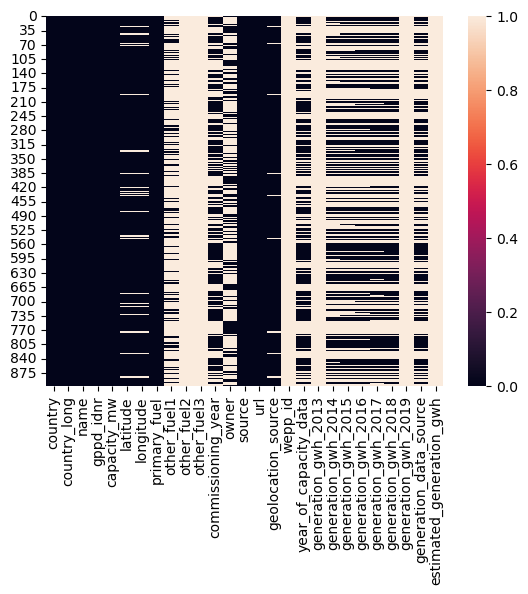

In [13]:
# Heatmap of null values
sns.heatmap(df.isnull())

**Observation:**

White space is indicating Missing Values are Presnt in The Dataset

In [15]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

###  Dataset Information
The dataset contains a total of 907 entries (rows) and 27 columns. The memory usage of the dataset is approximately 191.4 KB.

### Data Types
The dataset consists of two main data types: float64 (for numerical values) and object (for text and categorical values).

### Missing Values
Many columns have missing values, as indicated by the difference between the total number of entries (907) and the non-null count for each column. Columns with complete data include: 'country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'primary_fuel', 'source', and 'url'.

### Geographical Data
* 'latitude' and 'longitude' columns have missing values (46 out of 907), indicating that not all power plants have precise geographical coordinates.
### Fuel Information
* 'primary_fuel' provides the primary type of fuel used by each power plant.
* 'other_fuel1', 'other_fuel2', and 'other_fuel3' columns have varying degrees of missing values, suggesting that additional fuel types are not commonly specified.

### Commissioning Year
* 'commissioning_year' has missing values for a significant portion of the power plants (380 out of 907), indicating incomplete information about when the plants were commissioned.
### Ownership Information
* 'owner' column has missing values for many power plants (565 out of 907), suggesting incomplete ownership information.
Generation Data
* Columns related to generation data ('generation_gwh_2014' through 'generation_gwh_2018') have varying levels of missing values, indicating incomplete or unavailable data for those years.

### Data Source and ID
* 'source' and 'geolocation_source' provide information about the sources of various data points, such as capacity and geolocation data.
* 'wepp_id' has all missing values, suggesting it may not be relevant or used in this dataset.
* 'generation_data_source' indicates the source of generation data, but it also has some missing values (458 out of 907).

### Estimation and Null Data
* Several columns, such as 'generation_gwh_2013', 'generation_gwh_2019', and 'estimated_generation_gwh', have all missing values, indicating that no valid data is available in these columns.

In [16]:
# checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

### Number of Unique Values in Each Column
**Categorical Columns:**

* 'country' and 'country_long' have only one unique value each. This suggests that all data entries belong to a single country.
* 'name' and 'gppd_idnr' have a total of 907 unique values, indicating that each power plant is uniquely identified.
* 'primary_fuel' has 8 unique values, representing different primary fuel types used by power plants.
* 'other_fuel1' and 'other_fuel2' have a small number of unique values (3 and 1, respectively).
* 'geolocation_source' has 3 unique values, representing different sources of geolocation data.
* 'owner' and 'source' have relatively larger numbers of unique values, indicating variations in ownership and data sources.
* 'url' has 304 unique values, indicating a variety of URLs associated with the power plants.

### Numerical Columns

* 'capacity_mw' has 361 unique values, indicating a range of power plant capacities.
* 'latitude' and 'longitude' have a relatively large number of unique values, suggesting diverse geographical locations.
* 'commissioning_year' has 73 unique values, indicating a wide range of commissioning years.
* 'year_of_capacity_data' has only one unique value, suggesting uniformity in the available year of capacity data.

### Generation Data
* Columns related to generation data ('generation_gwh_2014' through 'generation_gwh_2018') have varying numbers of unique values, suggesting variations in electricity generation over the years.

### Unused or Zero-Valued Columns
* Columns 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', and 'estimated_generation_gwh' have zero unique values, implying these columns may not contain meaningful or used data.

Overall, the dataset contains diverse and unique information for various columns, with variations in fuel types, ownership, geographical locations, and generation data.

In [17]:
# checking the count of name
df['name'].value_counts()

ACME Solar Tower                                                   1
RAICHUR                                                            1
PRYAGRAJ (BARA) TPP                                                1
PULICHINTALA                                                       1
PUNE MILL                                                          1
PURULIA PSS                                                        1
PYKARA                                                             1
PYKARA ALIMATE                                                     1
Panandhro Solar Power Plant                                        1
Patan Taluka Wind Farm                                             1
Patnaik Hatti Wind Farm                                            1
Patnaik Jamnagar Wind Farm                                         1
Patodi Solar Power Plant                                           1
Phagi Solar Power Plant                                            1
Pokhran FVE Solar Power Plant     

Here we can observe that the name column has unique name for each power plant so dropping this column is good for our model.

In [18]:
# checking the count of gppd-idnr
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
IND0000347    1
IND0000348    1
IND0000349    1
WRI1026180    1
WRI1026663    1
WRI1026750    1
WRI1026751    1
WRI1026181    1
WRI1026182    1
WRI1026183    1
WRI1026184    1
WRI1026673    1
WRI1026788    1
WRI1026792    1
WRI1026791    1
WRI1026185    1
WRI1026186    1
WRI1026187    1
IND0000350    1
IND0000351    1
WRI1019896    1
IND0000354    1
IND0000345    1
IND0000344    1
IND0000343    1
IND0000329    1
IND0000319    1
IND0000320    1
IND0000321    1
IND0000323    1
IND0000324    1
IND0000325    1
IND0000326    1
WRI1019954    1
IND0000540    1
IND0000327    1
IND0000328    1
WRI1020017    1
IND0000342    1
IND0000330    1
IND0000331    1
IND0000333    1
IND0000334    1
IND0000335    1
IND0000336    1
IND0000337    1
IND0000338    1
IND0000339    1
IND0000340    1
IND0000341    1
IND0000355    1
WRI1019929    1
IND0000534    1
IND0000357    1
IND0000381    1
WRI1026679    1
IND0000352    1
IND00003

The column gppd_idnr also contains the unique ID of the power plant, so we can drop this column as well.

In [19]:
# checking the count of owner
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
Karnataka Power Corporation Limited                            3
Government of India                                            3
Enercon India Ltd.                                             3
Shree Naman Developers Ltd.                                    3
Ujaas Energy Limited                                           3
Hindustan Zinc ltd                                             3
Powerica Limited                                               3
Shri Ssk ltd                                                   3
Tata Power Solar Systems Limited (TPREL)                       3
Shree Sugars ltd                                               3
Maharashtra State Power G

In owner column there are 565 missing values out of 907 values so i am deleteing this column ..

**Here's the list of columns that appear to be not usable for prediction**

In [21]:
not_usable_columns = [
    'country',#it have only one unique value each. This suggests that all data entries belong to a single country.
    'country_long',#it have only one unique value each. This suggests that all data entries belong to a single country.
    'year_of_capacity_data',# it has only one unique value, suggesting uniformity in the available year of capacity data
    'other_fuel3',#it  have zero unique values, implying these columns may not contain meaningful or used data.
    'wepp_id',#it  have zero unique values, implying these columns may not contain meaningful or used data.
    'generation_gwh_2013',#it  have zero unique values, implying these columns may not contain meaningful or used data.
    'generation_gwh_2019',#it  have zero unique values, implying these columns may not contain meaningful or used data.
    'estimated_generation_gwh',#it  have zero unique values, implying these columns may not contain meaningful or used data.
    'generation_data_source',# it indicates the source of generation data, but it also has some missing values (458 out of 907)
    'name',# it contains unique name
    'gppd_idnr',# it contains unique id
    'url',#i dont think that url gives importance in prdiction
    'other_fuel2',#it has 906 null values out of 907 values
    'owner',#In owner column there are 565 missing values out of 907 values
]

In [22]:
df.drop(columns=not_usable_columns,axis=1, inplace=True)

In [23]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [24]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

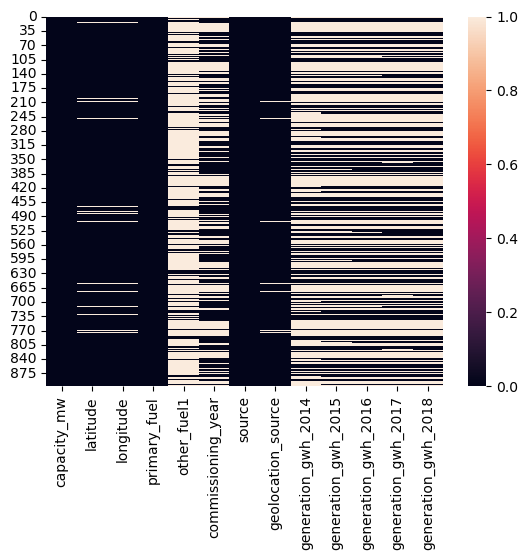

In [25]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

In [26]:
#checking columns after removing all unnecessary columns
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

**Separate categorical and numerical columns:**

In [27]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [28]:
categorical_columns

Index(['primary_fuel', 'other_fuel1', 'source', 'geolocation_source'], dtype='object')

In [29]:
numerical_columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

**Imputing Null Values:**

In [30]:
# Imputation techniques
impute_techniques = {
    'other_fuel1': 'mode',
    'geolocation_source': 'mode',
    'source':'mode',
    'latitude': 'mean',
    'longitude': 'mean',
    'commissioning_year': 'median',
    'generation_gwh_2014': 'median',
    'generation_gwh_2015': 'median',
    'generation_gwh_2016': 'median',
    'generation_gwh_2017': 'median',
    'generation_gwh_2018': 'median'
}

# Impute based on defined techniques
for column, technique in impute_techniques.items():
    if technique == 'mode':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    elif technique == 'mean':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    elif technique == 'median':
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

df.sample(5)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
497,15.00,19.2610,73.3638,Coal,Oil,2001.0,Technocraft Technocraft group,WRI,801.123775,711.181225,737.20545,817.97725,751.644375
611,21.80,23.2478,70.5948,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.20545,817.97725,751.644375
325,3.75,34.5605,76.1299,Hydro,Oil,1995.0,Central Electricity Authority,WRI,801.123775,711.181225,737.20545,817.97725,751.644375
481,46.00,23.5496,74.4072,Coal,Oil,2001.0,Rswm Rswm ltd,WRI,801.123775,711.181225,737.20545,817.97725,751.644375
620,18.70,26.2984,74.1234,Coal,Oil,2001.0,Ambuja Cements ltd,WRI,801.123775,711.181225,737.20545,817.97725,751.644375


In [31]:
#after filling null values
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

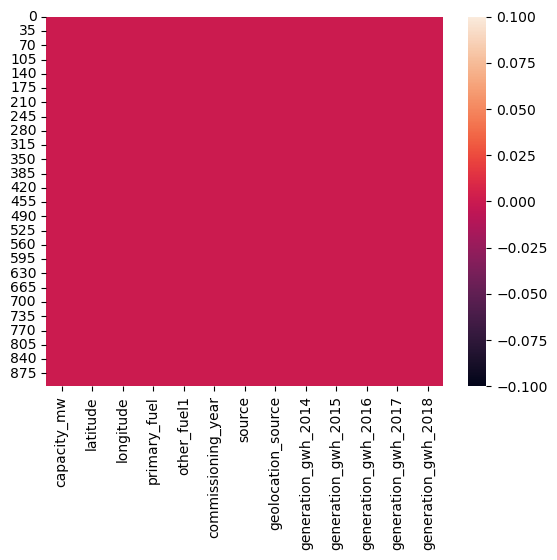

In [32]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

**Statistical summary of dataset:**

In [33]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1998.728776,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,6.079148,4.812291,13.158621,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,21.281800,76.979200,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2003.000000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


### Observations on Summary Statistics
Here are some observations based on the summary statistics for the provided columns in the dataset:

* **Capacity (capacity_mw):** The capacity of power plants varies significantly, with a range from 0.00 MW to a maximum of 4760.00 MW. The average capacity is approximately 326.22 MW, and the distribution has a relatively high standard deviation of 590.08 MW, indicating a wide spread of capacity values.

* **Geographical Coordinates (latitude and longitude):** The latitude values range from 8.17 to 34.65, and the longitude values range from 68.64 to 95.41. These coordinates represent the locations of the power plants. The distribution of both latitude and longitude appears to be relatively spread out, which is expected due to the diverse geographical locations.

* **Commissioning Year (commissioning_year):** The power plants in the dataset were commissioned over a range of years, from 1927 to 2018. The average commissioning year is around 1998.73, suggesting that most of the power plants were established in the late 20th century and early 21st century.

* **Generation (generation_gwh_2014 to generation_gwh_2018):** The generation values for different years show a significant variation. For instance, generation in 2014 ranges from 0.00 GWh to 28127.00 GWh, with an average of approximately 1516.69 GWh. The subsequent years (2015 to 2018) exhibit similar patterns, with varying averages and standard deviations.

These observations provide insights into the distribution and characteristics of the numerical columns in the dataset. The wide ranges, high standard deviations, and varying averages in some columns indicate the diversity and heterogeneity of the data, which can impact subsequent analyses and decision-making processes.

**Checking Skewness:**

In [34]:
skewness = df.skew()
skewness

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.719575
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

### Observations on Skewness of Numerical Columns:

Skewness is a measure of the asymmetry of a probability distribution. Positive skewness indicates that the distribution has a tail on the right side, while negative skewness indicates a tail on the left side. Here are some observations based on the calculated skewness values for the numerical columns in the dataset:

* **Capacity (capacity_mw):** The capacity column has a positive skewness of approximately 3.12. This indicates that the distribution of capacity values is skewed to the right, suggesting that there might be a few power plants with very high capacity values, leading to a long right tail.

* **Geographical Coordinates (latitude and longitude):** The latitude column has a slightly negative skewness of about -0.15, indicating a very slight left skew. The longitude column, on the other hand, has a positive skewness of around 1.14, suggesting a right-skewed distribution. These slight skews might be due to the geographical diversity of power plant locations.

* **Commissioning Year (commissioning_year):** The commissioning year column has a notable negative skewness of approximately -1.72. This suggests that there might be a concentration of power plants commissioned in more recent years, leading to a left-skewed distribution.

* **Generation (generation_gwh_2014 to generation_gwh_2018):** The generation columns (2014 to 2018) all exhibit strong positive skewness values, ranging from about 5.13 to 5.57. These high positive skews indicate that the distribution of generation values is highly skewed to the right, possibly indicating a few power plants with significantly higher generation values.

These skewness observations provide insights into the distribution shapes of the numerical columns. Understanding skewness is important for making appropriate data transformations or modeling decisions in subsequent analyses.

### Taking Insigts By Visualizing The Data

In [35]:
df['capacity_mw'].value_counts()

5.000       39
10.000      22
600.000     20
15.000      20
1200.000    19
20.000      18
1.000       18
30.000      16
50.000      15
100.000     14
60.000      13
500.000     12
300.000     11
24.000      11
25.000      11
120.000     10
16.000       9
36.000       9
1000.000     9
3.000        8
12.000       8
40.000       8
6.000        8
9.000        8
10.500       7
1320.000     7
250.000      7
50.400       7
90.000       7
75.000       7
240.000      7
16.500       6
2.000        6
21.000       6
150.000      6
4.000        6
270.000      5
35.000       5
18.000       5
45.000       5
22.500       5
22.000       5
750.000      4
11.200       4
80.000       4
1500.000     4
540.000      4
25.500       4
630.000      4
440.000      4
125.000      4
330.000      4
26.000       4
96.000       4
1050.000     4
2000.000     4
135.000      4
1340.000     4
6.600        3
4.500        3
28.000       3
160.000      3
420.000      3
800.000      3
1980.000     3
180.000      3
46.000    

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

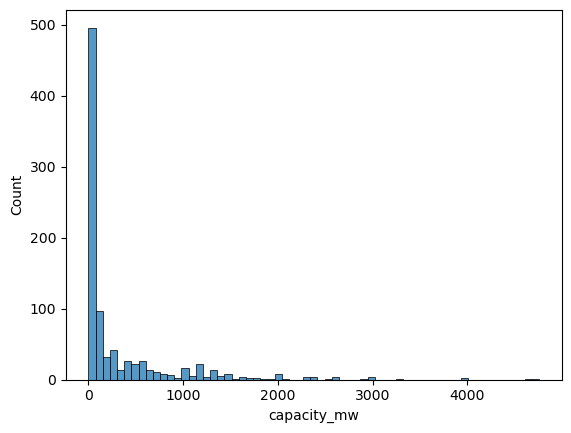

In [36]:
sns.histplot(df['capacity_mw'])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

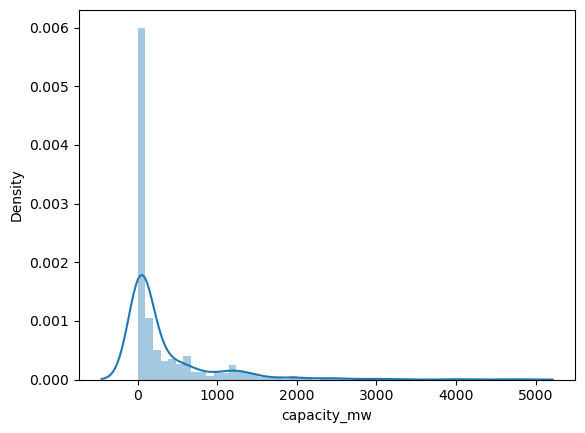

In [37]:
sns.distplot(df['capacity_mw'])

capacity_mw IS right skewed

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

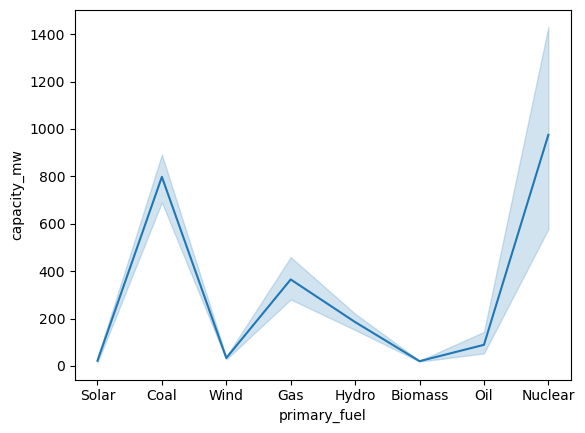

In [38]:
sns.lineplot(x='primary_fuel',y='capacity_mw',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

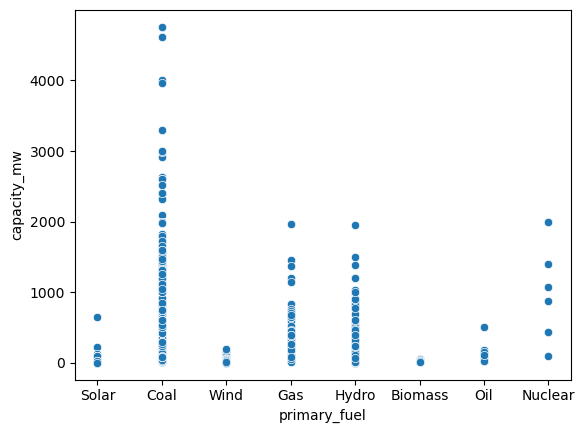

In [39]:
sns.scatterplot(x='primary_fuel',y='capacity_mw', data=df)

There are high electrical generating capacity on capacity_mw on coal, gas ,Hydro and Nuclear

### primary_fuel

In [42]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

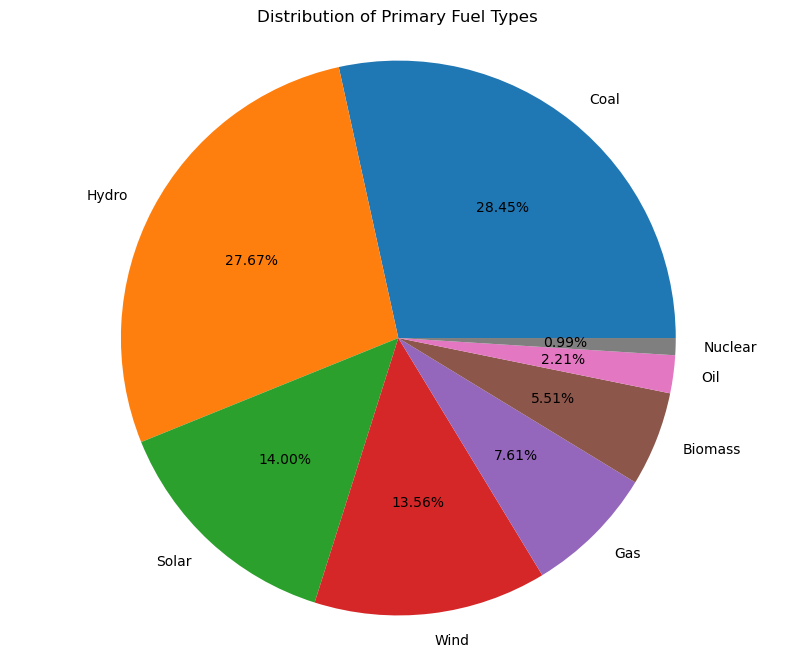

In [43]:
plt.figure(figsize=(10, 8))
plt.pie(df['primary_fuel'].value_counts().values, labels=df['primary_fuel'].value_counts().index, autopct='%1.2f%%')

plt.title('Distribution of Primary Fuel Types')
plt.axis('equal') 

plt.show()

Coal and Hydro has maximum shares

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

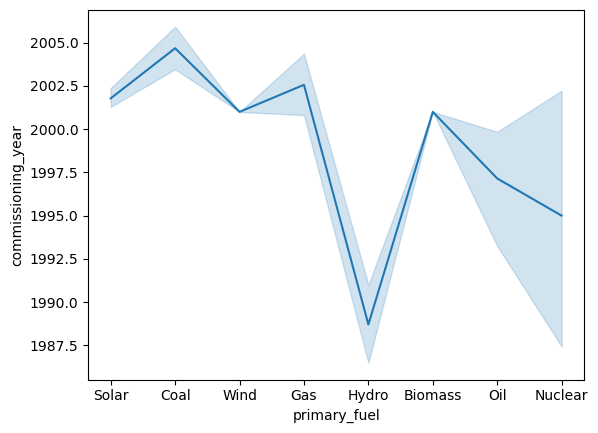

In [44]:
sns.lineplot(x='primary_fuel',y='commissioning_year',data=df)

### other_fuel1

In [45]:
df['other_fuel1'].value_counts()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

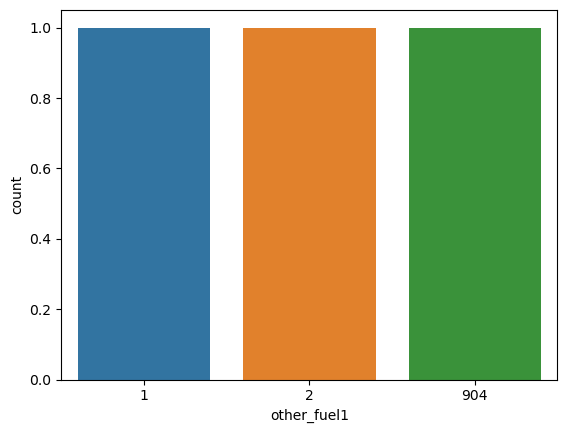

In [46]:
sns.countplot(df['other_fuel1'].value_counts())

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

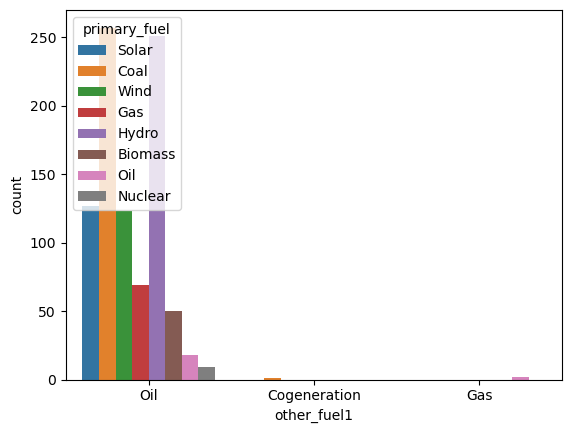

In [47]:
sns.countplot('other_fuel1',hue='primary_fuel',data=df)

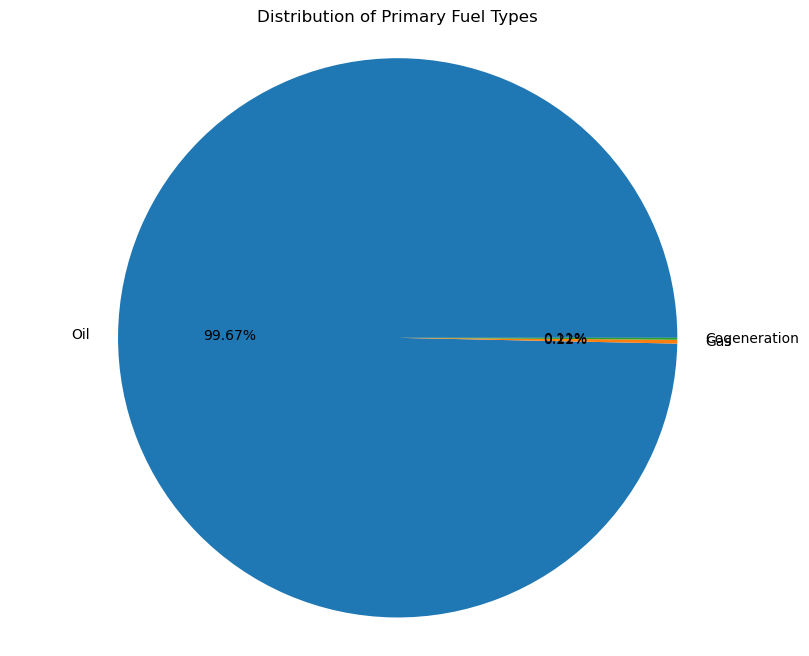

In [48]:
plt.figure(figsize=(10, 8))
plt.pie(df['other_fuel1'].value_counts().values, labels=df['other_fuel1'].value_counts().index, autopct='%1.2f%%')

plt.title('Distribution of Primary Fuel Types')
plt.axis('equal') 

plt.show()

in other_fuel1 Oil has 99.67 unique values

### Commissioning_year

In [49]:
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
2010.0     18
2014.0     17
2017.0     16
2002.0     16
2000.0     16
2011.0     13
1993.0     13
1996.0     13
1999.0     13
1995.0     12
1992.0     11
1991.0     10
1994.0     10
2007.0     10
2006.0     10
2009.0     10
1984.0     10
2003.0     10
2005.0     10
1998.0      9
1990.0      9
2004.0      9
2008.0      9
1987.0      8
1997.0      8
1988.0      7
1979.0      7
2018.0      6
1989.0      6
1980.0      6
1986.0      6
1970.0      5
1957.0      5
1981.0      4
1976.0      4
1978.0      4
1983.0      4
1966.0      4
1985.0      4
1975.0      4
1977.0      3
1973.0      3
1961.0      3
1963.0      3
1960.0      3
1968.0      3
1962.0      3
1965.0      2
1982.0      2
1952.0      2
1974.0      2
1955.0      2
1971.0      2
1967.0      2
1972.0      2
1964.0      2
1949.0      1
1959.0      1
1937.0      1
1956.0      1
1946.0      1
1958.0      1
1943.0      1
1954.0      1
1969.0      1
1939.0      1
1927.0

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

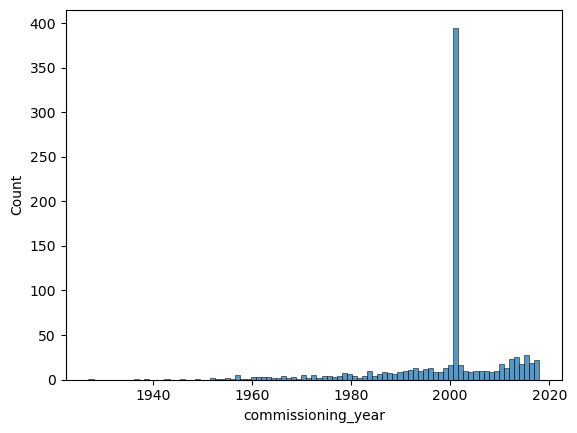

In [50]:
sns.histplot(df['commissioning_year'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

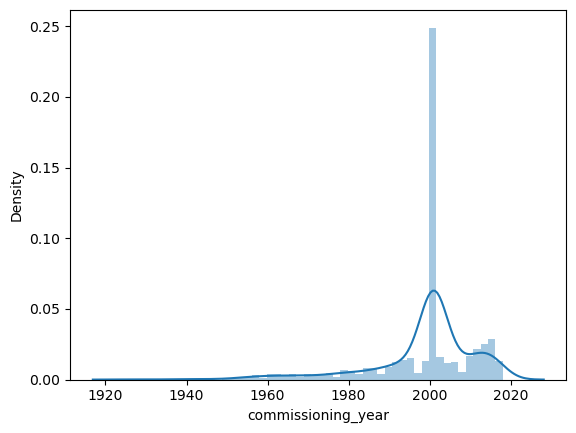

In [51]:
sns.distplot(df['commissioning_year'])

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

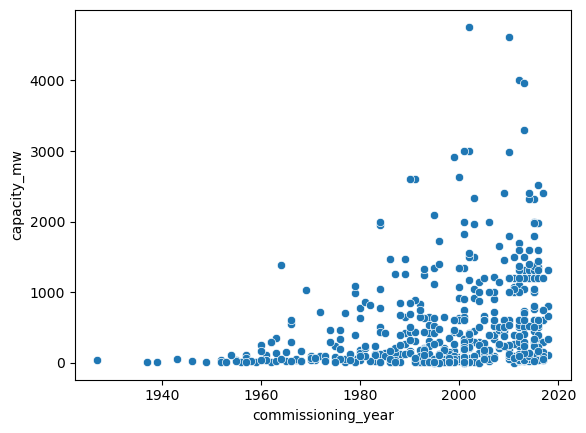

In [52]:
sns.scatterplot(x='commissioning_year',y='capacity_mw', data=df)

as commissioning_year are increasing capacity_mv also increasing

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

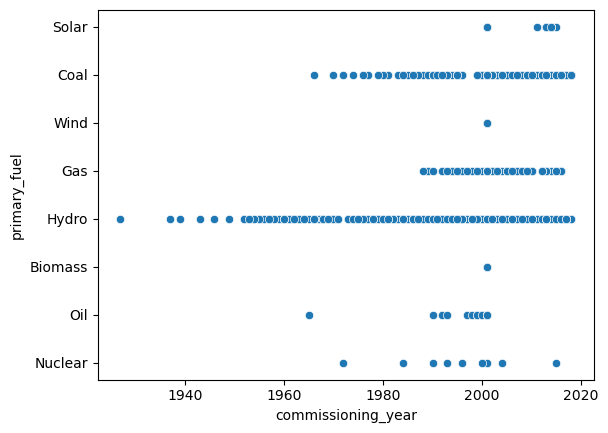

In [53]:
sns.scatterplot(x='commissioning_year',y='primary_fuel', data=df)

### geolocation_source

In [54]:
df['geolocation_source'].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

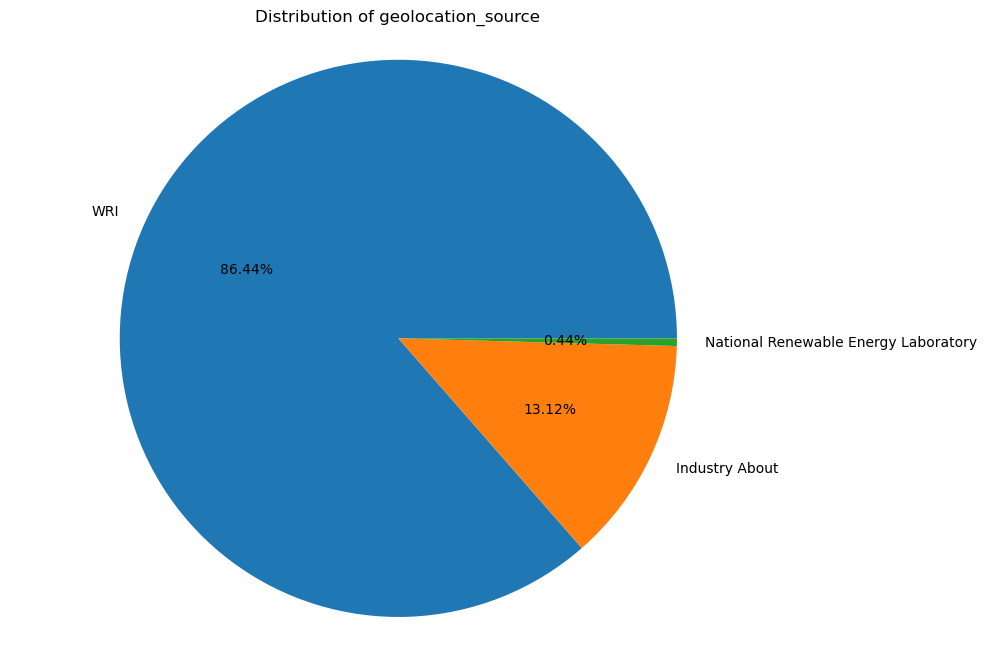

In [55]:
plt.figure(figsize=(10, 8))
plt.pie(df['geolocation_source'].value_counts().values, labels=df['geolocation_source'].value_counts().index, autopct='%1.2f%%')

plt.title('Distribution of geolocation_source')
plt.axis('equal') 

plt.show()

in geolocation_source columns there are 86.44% values are WRI , 13.12% are indusrty about , 0.44% are National Renewable Energy Laboratory

### 'generation_gwh_2014' , 'generation_gwh_2015' , 'generation_gwh_2016' , 'generation_gwh_2017' , 'generation_gwh_2018'

In [56]:
Generation = ['generation_gwh_2014' , 'generation_gwh_2015' , 'generation_gwh_2016' , 'generation_gwh_2017' , 'generation_gwh_2018']

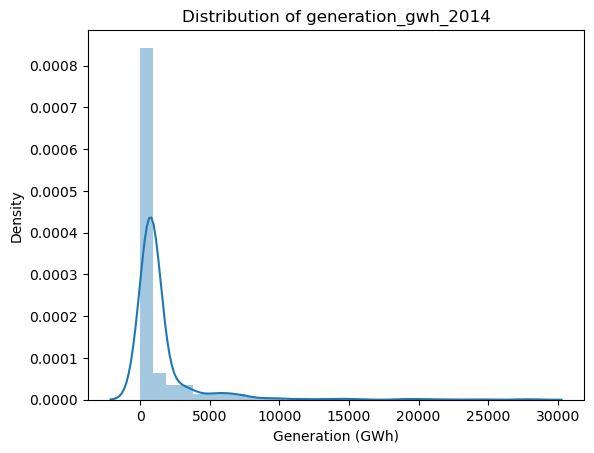

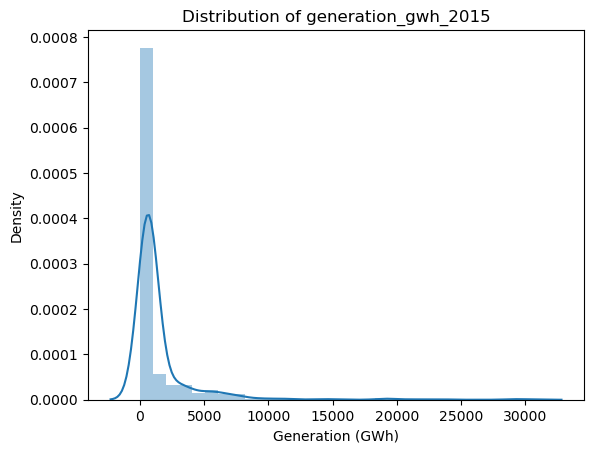

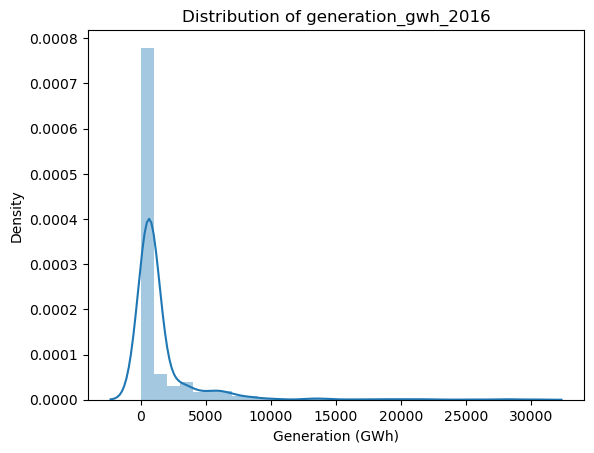

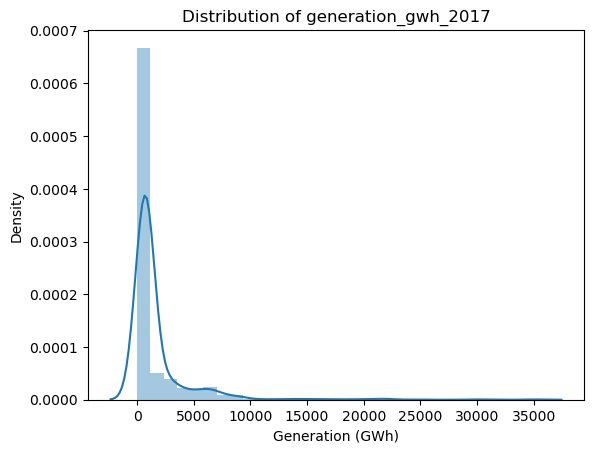

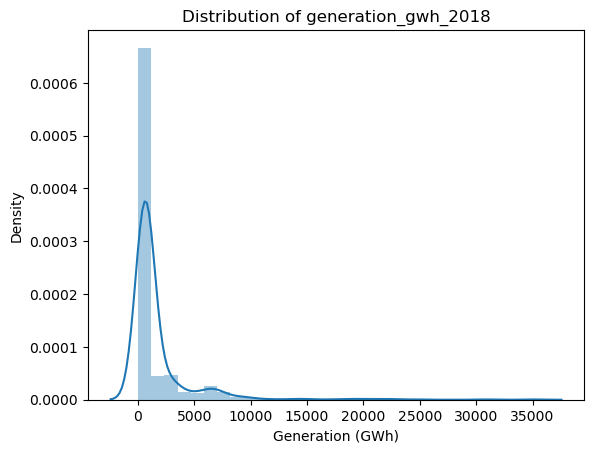

In [57]:
for i in Generation:
    sns.distplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.xlabel('Generation (GWh)')
    plt.ylabel('Density')
    plt.show()

They are all highly positive skewed possibly indicating a few power plants with significantly higher generation values.

### Multivariate Analysis

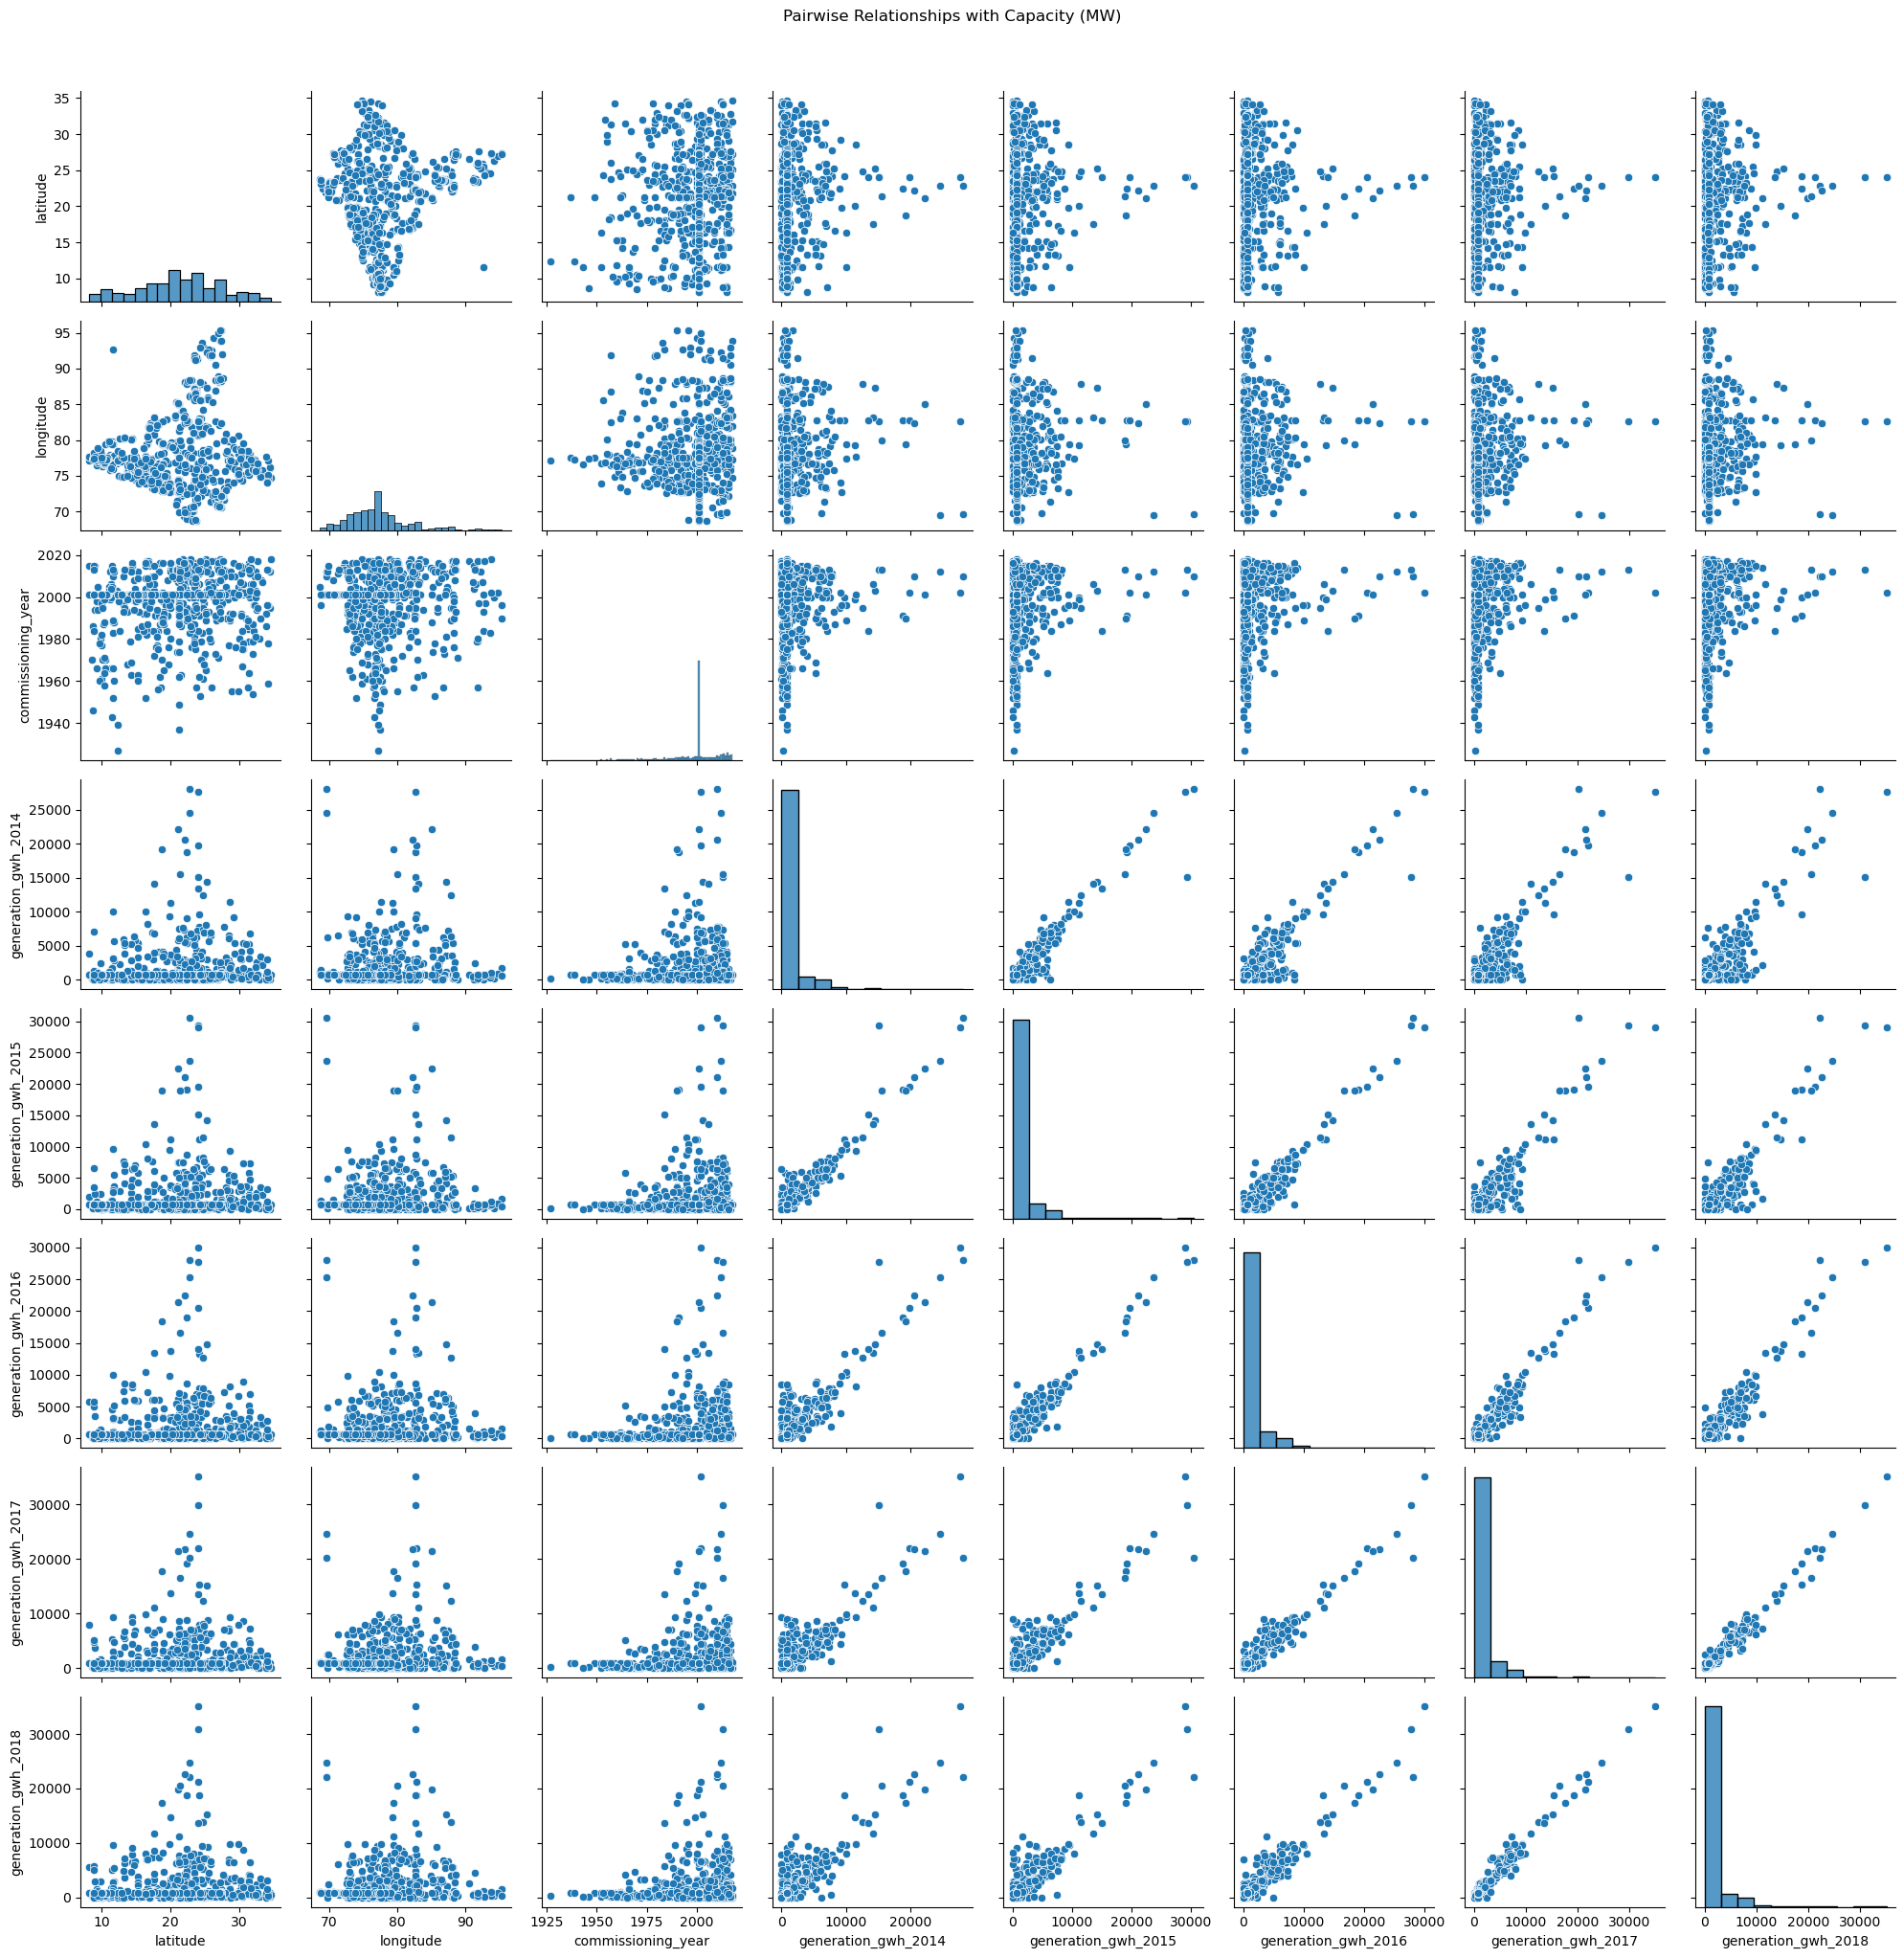

In [58]:
# Create a scatter plot matrix
sns.pairplot(df, vars=['latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015',
                      'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'], kind='scatter')

# Set titles and adjust layout
plt.suptitle('Pairwise Relationships with Capacity (MW)', y=1.02)
plt.tight_layout()

# Show the scatter plot matrix
plt.show()

**Observation:**

* We can see that the most of columns are highly correlated with each other
* most of columns have strong linear relationship
* there are lots of Outliers are present

### Cleansing Data

### 1. Encoding the categorical columns using Label Encoding

In [59]:
categorical_col = ['primary_fuel', 'other_fuel1','source','geolocation_source']

In [60]:
LE = LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)

In [62]:

df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


Here we have given data as below

* 0-Biomass
* 1-coal
* 2-gas
* 3-hydro
* 4-nuclear
* 5-oil
* 6-solar
* 7-wind


### 2.Checking Outliers by using Box Plot

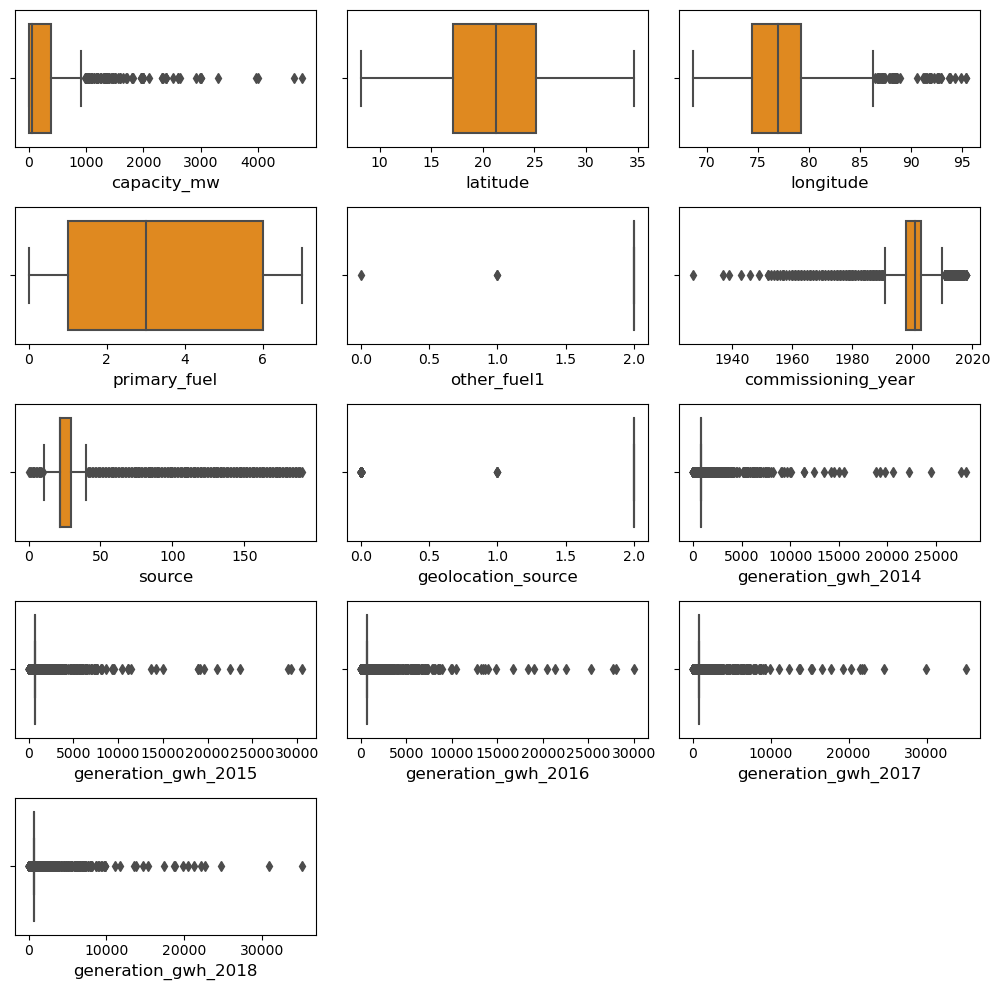

In [63]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can see that there are lots of outliers present in approx every column

### Handling Outliers By Z score

In [64]:
clolumns_to_be_handle = df[[  'longitude',
                            'other_fuel1',
                            'commissioning_year',
                            'source', 'geolocation_source',
                            'generation_gwh_2014',
                            'generation_gwh_2015',
                            'generation_gwh_2016',
                           'generation_gwh_2017',
                           'generation_gwh_2018']]

In [65]:
z=np.abs(zscore(clolumns_to_be_handle))
z

,longitude,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,8.782797e-01,0.054303,0.933076,1.460215,1.083349,0.257022,0.267783,0.275737,0.275565,0.288394
1,5.937884e-01,0.054303,0.172699,2.917019,0.394241,0.257022,0.267783,0.275737,0.275565,0.288394
2,1.682394e+00,0.054303,0.172699,0.512075,0.394241,0.257022,0.267783,0.275737,0.275565,0.288394
3,2.889052e+00,0.054303,0.400812,0.489662,0.394241,0.322873,0.223348,0.226194,0.326203,0.327990
4,1.027976e+00,0.054303,1.237227,0.489662,0.394241,0.545554,1.476964,1.557432,1.224379,1.772608
5,1.833861e+00,0.054303,0.476850,0.489662,0.394241,0.130481,0.100967,0.129717,0.167218,0.217347
6,9.503984e-02,0.054303,2.184471,0.489662,0.394241,0.488182,0.455152,0.500741,0.514745,0.510465
7,5.362300e-02,0.054303,0.857038,0.489662,0.394241,0.302542,0.264379,0.296207,0.321008,0.342805
8,3.282175e-01,0.054303,0.400812,0.489662,0.394241,0.372151,0.457753,0.387334,0.399894,0.397411
9,8.675067e-01,0.054303,0.704963,0.489662,0.394241,0.133335,0.044572,0.075670,0.030758,0.055929


In [66]:
# creating new dataframe

df= df[(z<3).all(axis=1)]
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.500,28.183900,73.240700,6,2,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.000,24.766300,74.609000,1,2,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.200,21.903800,69.373200,7,2,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.000,23.871200,91.360200,2,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.000,21.960300,82.409100,1,2,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.000,23.768900,68.644700,1,2,2005.0,22,2,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.000,10.454700,77.007800,3,2,1970.0,22,2,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.000,32.225800,77.207000,3,2,2010.0,22,2,674.391100,721.335200,675.724400,679.594950,579.318850
8,290.000,16.330000,75.886300,3,2,2004.0,22,2,480.594950,144.434200,402.029750,439.372100,406.377900
9,210.000,23.164200,81.637300,1,2,2008.0,22,2,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000


### Checking Data Loss

In [67]:
# checking the data loss
data_loss = (907-833)/907*100
data_loss

8.158765159867695

### Heat Map to Check Corelation:

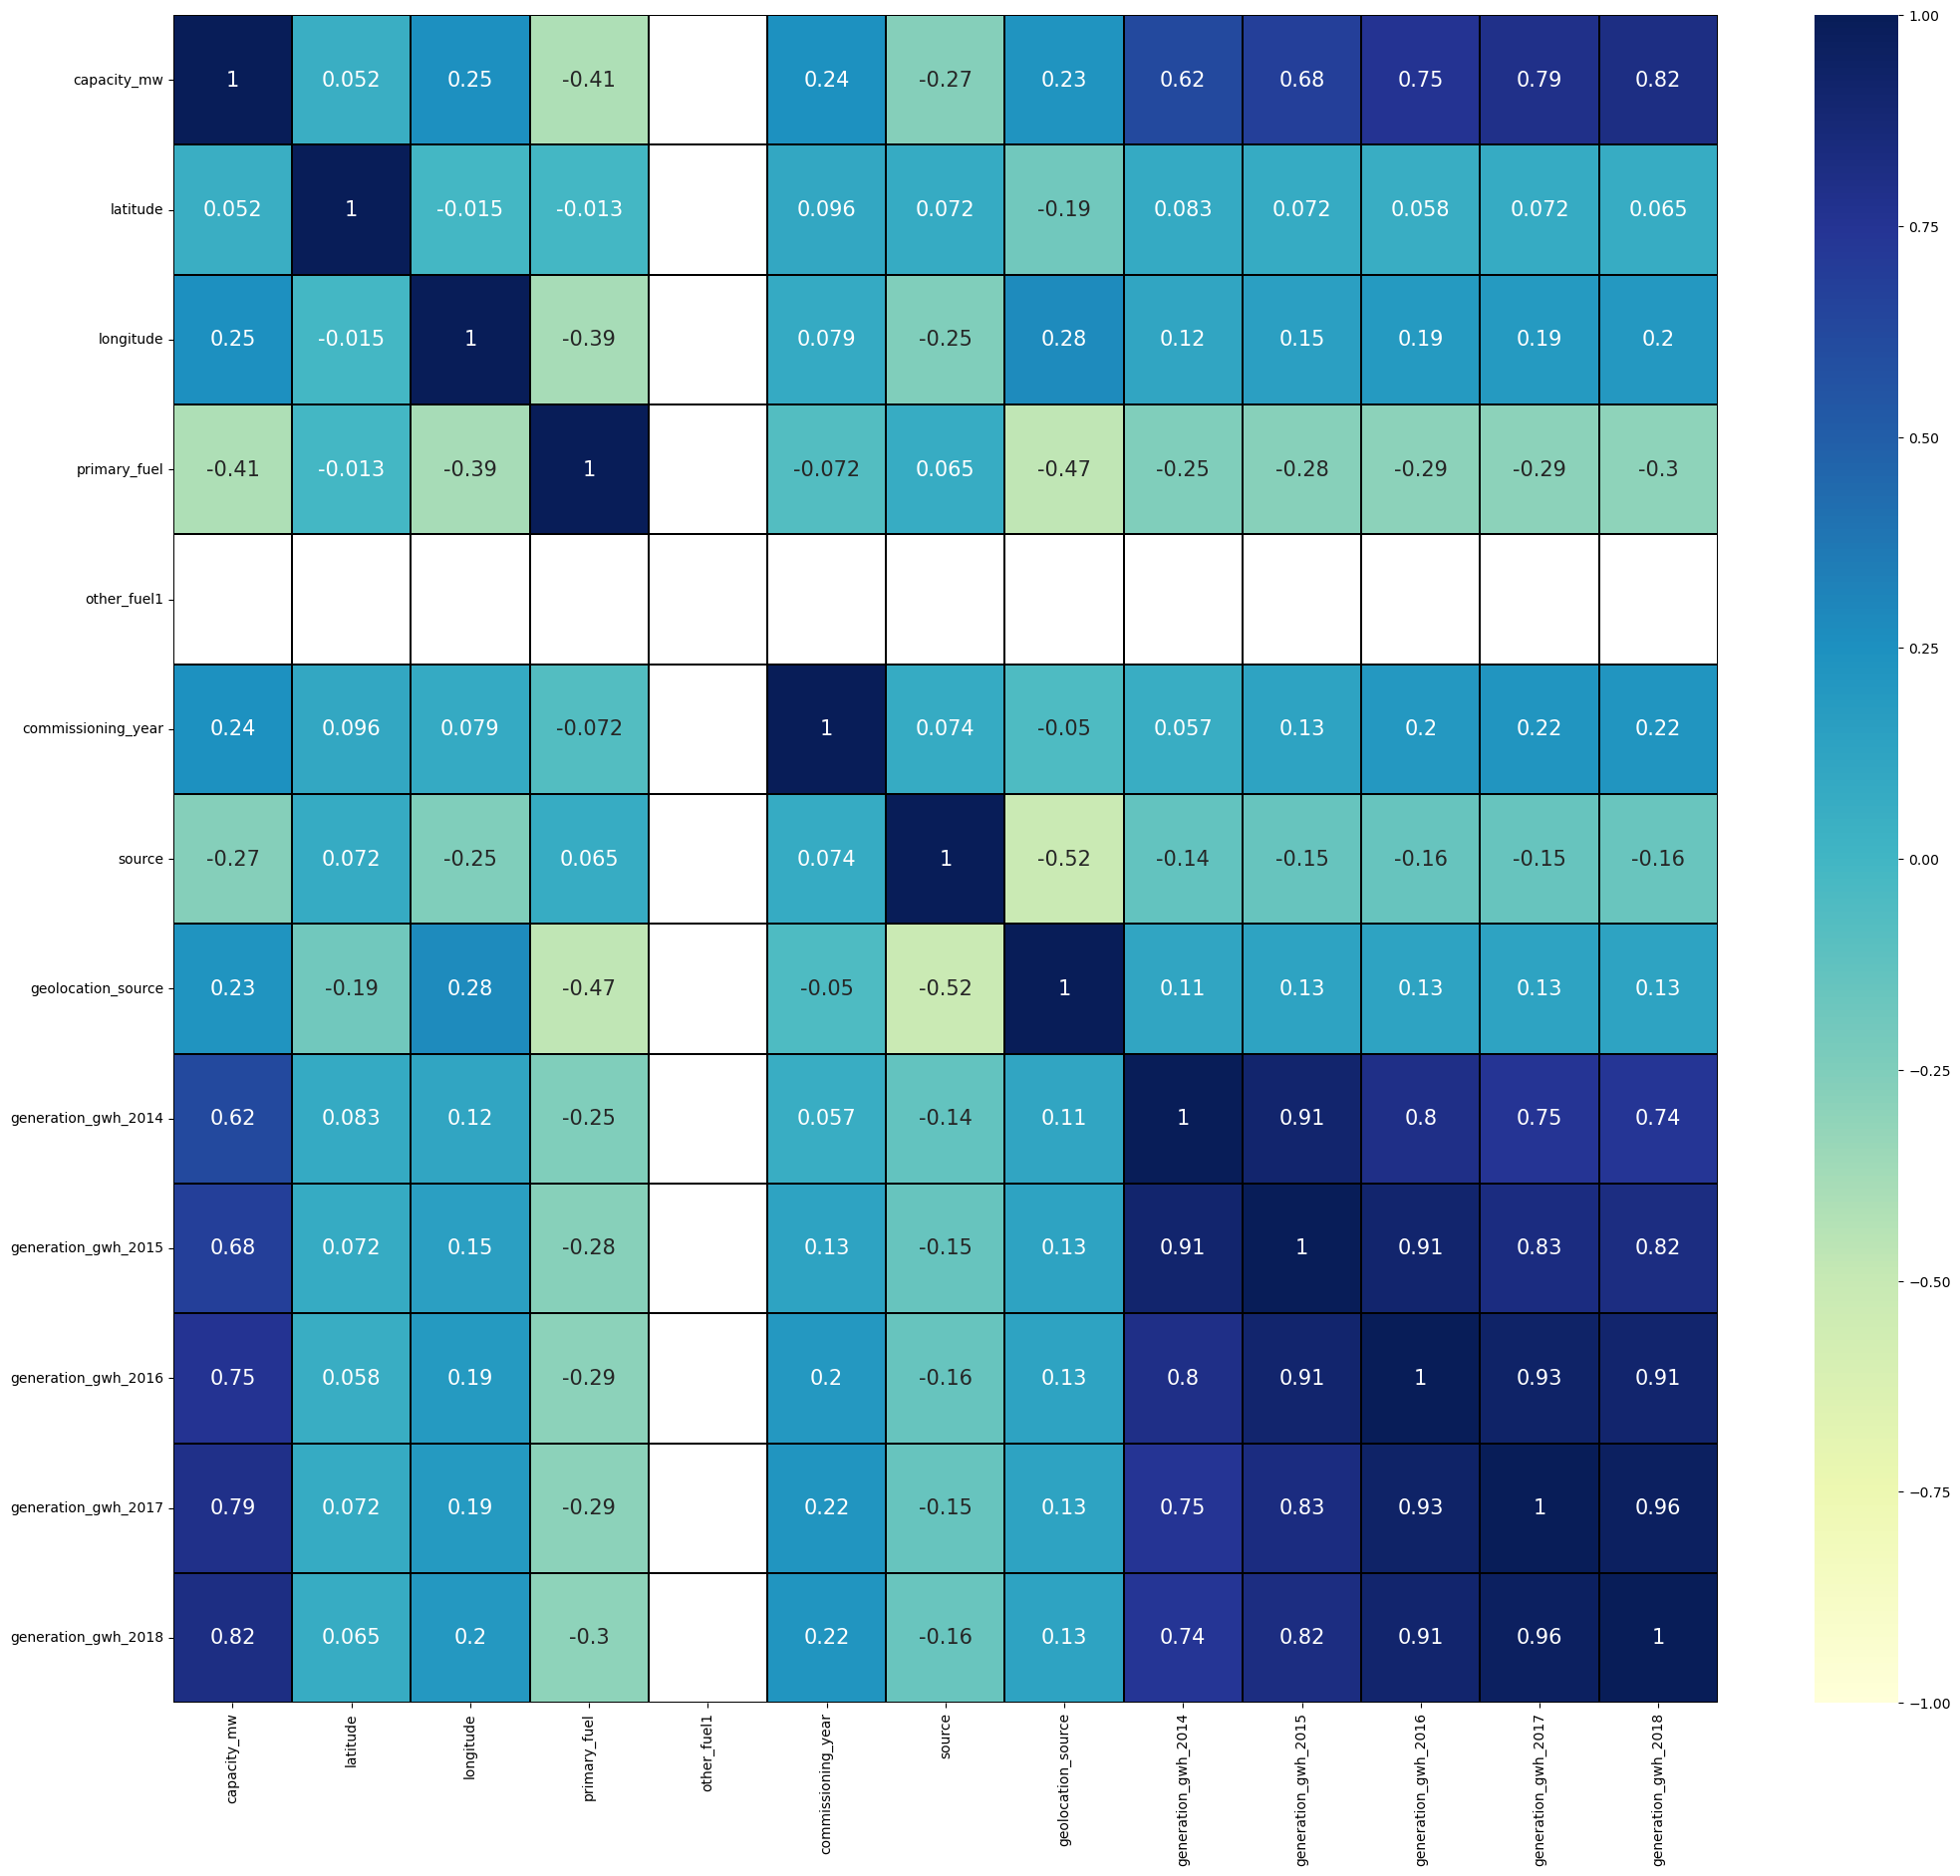

In [68]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

### 3.Checking Correlation with Target Column

In [69]:
#correlation with target column
correlation_with_quality = df.corr()['capacity_mw'].abs().sort_values(ascending=False)
print(correlation_with_quality)

capacity_mw            1.000000
generation_gwh_2018    0.815893
generation_gwh_2017    0.789653
generation_gwh_2016    0.750619
generation_gwh_2015    0.681289
generation_gwh_2014    0.620033
primary_fuel           0.408854
source                 0.268891
longitude              0.254214
commissioning_year     0.244299
geolocation_source     0.234034
latitude               0.051560
other_fuel1                 NaN
Name: capacity_mw, dtype: float64


In [70]:
#correlation with target column
correlation_with_quality = df.corr()['primary_fuel'].abs().sort_values(ascending=False)
print(correlation_with_quality)

primary_fuel           1.000000
geolocation_source     0.471799
capacity_mw            0.408854
longitude              0.389679
generation_gwh_2018    0.303930
generation_gwh_2017    0.294567
generation_gwh_2016    0.291554
generation_gwh_2015    0.280704
generation_gwh_2014    0.254123
commissioning_year     0.071653
source                 0.065295
latitude               0.012943
other_fuel1                 NaN
Name: primary_fuel, dtype: float64


we can see that other_fuel1 is is no correlated with target columns so we will delete this column

In [71]:
# dropping irrelevant columns
df.drop('other_fuel1',axis=1,inplace=True)

### 4.Checking Correlation between columns to columns

In [72]:
#schecking correlation
df_corr = df.corr()
df_corr

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051560,0.254214,-0.408854,0.244299,-0.268891,0.234034,0.620033,0.681289,0.750619,0.789653,0.815893
latitude,0.051560,1.000000,-0.015434,-0.012943,0.096337,0.072090,-0.194814,0.082703,0.072170,0.057637,0.071781,0.064655
longitude,0.254214,-0.015434,1.000000,-0.389679,0.078615,-0.250857,0.277772,0.115115,0.149735,0.191064,0.192532,0.199978
primary_fuel,-0.408854,-0.012943,-0.389679,1.000000,-0.071653,0.065295,-0.471799,-0.254123,-0.280704,-0.291554,-0.294567,-0.303930
commissioning_year,0.244299,0.096337,0.078615,-0.071653,1.000000,0.074102,-0.049901,0.057465,0.128293,0.197630,0.221703,0.219953
source,-0.268891,0.072090,-0.250857,0.065295,0.074102,1.000000,-0.521141,-0.138855,-0.153684,-0.156064,-0.153454,-0.162739
geolocation_source,0.234034,-0.194814,0.277772,-0.471799,-0.049901,-0.521141,1.000000,0.113295,0.125394,0.127336,0.125207,0.132783
generation_gwh_2014,0.620033,0.082703,0.115115,-0.254123,0.057465,-0.138855,0.113295,1.000000,0.912051,0.800868,0.745884,0.737667
generation_gwh_2015,0.681289,0.072170,0.149735,-0.280704,0.128293,-0.153684,0.125394,0.912051,1.000000,0.907741,0.830112,0.821349
generation_gwh_2016,0.750619,0.057637,0.191064,-0.291554,0.197630,-0.156064,0.127336,0.800868,0.907741,1.000000,0.932665,0.913488


**We are writing this function to see those columns which are highly correlated with each other.**

In [73]:
correlation_threshold = 0.85
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [74]:
features_to_drop

{'generation_gwh_2015', 'generation_gwh_2017', 'generation_gwh_2018'}

In [75]:
df.drop(columns=['generation_gwh_2015', 'generation_gwh_2017', 'generation_gwh_2018'],axis=1, inplace=True)

Here We are copying dataframe because in this project i have to make two prediction **capacity_mw** and **Primary Fuel**

In [76]:
df1 = df.copy()

### Checking VIF according to capacity_mw

### VIF

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
#selecting only numerical columns
num=df.select_dtypes(np.number)

In [78]:
#drop target column
num.drop('capacity_mw',axis=1, inplace=True)

In [79]:
num.columns

Index(['latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2016'],
      dtype='object')

In [80]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(num)

In [81]:
standard=pd.DataFrame(standard, columns=num.columns)

In [84]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [85]:
VIF

,features,vif
0,latitude,1.073500
1,longitude,1.272987
2,primary_fuel,1.701859
3,commissioning_year,1.097841
4,source,1.591560
5,geolocation_source,1.988024
6,generation_gwh_2014,2.914009
7,generation_gwh_2016,3.105628


there is no multicolinearity

### Predicting capacity_mw

### Splitting into Feature and Target column

In [86]:
X= df.drop('capacity_mw', axis=1)
Y=df['capacity_mw']

### Checking Skewness

In [87]:
X.skew()

latitude              -0.125859
longitude              0.904136
primary_fuel           0.419979
commissioning_year    -1.263321
source                 1.782665
geolocation_source    -2.102192
generation_gwh_2014    2.907554
generation_gwh_2016    2.610557
dtype: float64

### Removing Skewness by using Power Transformer

In [89]:
from sklearn.preprocessing import power_transform

In [90]:
transformed=power_transform(X)
pd.DataFrame(transformed).skew()

0   -0.071949
1   -0.000585
2   -0.055416
3   -0.312069
4   -0.178437
5   -2.074065
6    0.225782
7    0.143408
dtype: float64

### Standardization

In [91]:
sc=StandardScaler()
X=sc.fit_transform(transformed)

### Model Training

**Finding best Randomstate:**

In [92]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= RandomForestRegressor()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8443461721538177 on Random State = 158


In [93]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20,random_state=maxRS)

### Defining All Regression Models

In [96]:
# Create instances of regression models
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
Bag_model = BaggingRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

# Create a list of regression models
model = [LR_model, RFR_model, GB_model, ADA_model, Bag_model, DT_model, KNR_model]

### Model training

In [97]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_train = reg_model.score(x_train, y_train)
    pred = reg_model.predict(x_test)
    r2_test = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('*' * 30)

Model: LinearRegression()
R-squared (Train): 0.481082371573498
R-squared (Test): 0.5656439618160918
Mean Squared Error (MSE): 93106.9038082423
Mean Absolute Error (MAE): 224.80506239912808
******************************
Model: RandomForestRegressor()
R-squared (Train): 0.9511528352194252
R-squared (Test): 0.8329936953965644
Mean Squared Error (MSE): 35798.834530069056
Mean Absolute Error (MAE): 92.3195386376045
******************************
Model: GradientBoostingRegressor()
R-squared (Train): 0.920149760229503
R-squared (Test): 0.8358310260477175
Mean Squared Error (MSE): 35190.63515263289
Mean Absolute Error (MAE): 96.04522214553398
******************************
Model: AdaBoostRegressor()
R-squared (Train): 0.6770649139900446
R-squared (Test): 0.6415946235264129
Mean Squared Error (MSE): 76826.40962286825
Mean Absolute Error (MAE): 241.27126832337362
******************************
Model: BaggingRegressor()
R-squared (Train): 0.9431397976108077
R-squared (Test): 0.8397937341956335
M

### CrossValidation

In [99]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_test = r2_score(y_test, reg_model.predict(x_test))
    
    cv_r2 = cross_val_score(reg_model, X, Y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('*' * 50)

Model: LinearRegression()
R-squared (Test): 0.5656439618160918
Cross-validation R-squared: 0.48647004135613725
**************************************************
Model: RandomForestRegressor()
R-squared (Test): 0.8403220113628465
Cross-validation R-squared: 0.7422389057640928
**************************************************
Model: GradientBoostingRegressor()
R-squared (Test): 0.8348095321296586
Cross-validation R-squared: 0.7265619398579085
**************************************************
Model: AdaBoostRegressor()
R-squared (Test): 0.5519423806048216
Cross-validation R-squared: 0.4792465332301399
**************************************************
Model: BaggingRegressor()
R-squared (Test): 0.8393816768108961
Cross-validation R-squared: 0.725702439883934
**************************************************
Model: DecisionTreeRegressor()
R-squared (Test): 0.6310421000505888
Cross-validation R-squared: 0.5082356586736625
**************************************************
Model: KNeighb

**Random Forest Regressor is best model**

### Hyperparameter tuning on RandomForest Regressor

In [100]:
n_estimator= [50,100,200] 
max_features= ['auto','sqrt']  
max_depth=[None, 10, 20]  
min_samples_split= [2, 5, 10] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [50, 100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 4, 7]}

In [101]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [102]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)

In [103]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [104]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.8448955471686597

## Saving the Model

In [106]:
joblib.dump(grid_search.best_estimator_,"GPPDIND_capacity_mw.pkl")

['GPPDIND_capacity_mw.pkl']

### 2.PREDICTING Target Variable primary_fuel

### VIF

In [107]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2016
0,2.5,28.1839,73.2407,6,2011.0,109,1,801.123775,737.205450
1,98.0,24.7663,74.6090,1,2001.0,174,2,801.123775,737.205450
2,39.2,21.9038,69.3732,7,2001.0,21,2,801.123775,737.205450
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,886.004428
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,6243.000000


In [108]:
# selecting only numerical columns
num=df1.select_dtypes(np.number)

In [109]:
#Drop target column
num.drop('primary_fuel',axis=1, inplace=True)

In [110]:
num.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2016'],
      dtype='object')

In [111]:
#Scaling Data
sc=StandardScaler()
standard=sc.fit_transform(num)

In [112]:
standard=pd.DataFrame(standard, columns=num.columns)

In [113]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [114]:
VIF

,features,vif
0,capacity_mw,2.580811
1,latitude,1.062325
2,longitude,1.151164
3,commissioning_year,1.136396
4,source,1.452781
5,geolocation_source,1.490254
6,generation_gwh_2014,2.922730
7,generation_gwh_2016,4.048358


Multicolinearity is in control.

### Splitting Columns into Feature and Target

In [115]:
X= df1.drop('primary_fuel', axis=1)
Y=df1['primary_fuel']

### Checking For Skewness

In [116]:
X.skew()

capacity_mw            2.140554
latitude              -0.125859
longitude              0.904136
commissioning_year    -1.263321
source                 1.782665
geolocation_source    -2.102192
generation_gwh_2014    2.907554
generation_gwh_2016    2.610557
dtype: float64

### Removing of Skewness by using Power Transformer Method

In [117]:
transformed=power_transform(X)
pd.DataFrame(transformed).skew()

0    0.013472
1   -0.071949
2   -0.000585
3   -0.312069
4   -0.178437
5   -2.074065
6    0.225782
7    0.143408
dtype: float64

### Standardization

In [118]:
sc=StandardScaler()
X=sc.fit_transform(transformed)

### Data Balancing

In [120]:
#Data Balancing Using Smote
sm=SMOTE()

In [121]:
x,y=sm.fit_resample(X,Y)

In [122]:
x.shape , y.shape

((1864, 8), (1864,))

In [123]:
y.value_counts()

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: primary_fuel, dtype: int64

Now target column is balanced

### Model Training

### Finding best Randomstate

In [125]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7694369973190348 on Random State = 42


In [126]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

### Defining All Classification Models

In [127]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

### Model training

In [128]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 76.94369973190348
Confusion Matrix of  LogisticRegression()  is 
 [[38  0  0  0  0  0  0  5]
 [ 7 19  4  5  9  1  0  1]
 [ 1  1 28  4  1  9  0  2]
 [ 1  2  2 27  8  4  0  7]
 [ 0  1  0  0 53  0  0  0]
 [ 0  1  0  0  0 36  0  4]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  2  4  0  0  0 40]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        43
           1       0.79      0.41      0.54        46
           2       0.78      0.61      0.68        46
           3       0.68      0.53      0.59        51
           4       0.75      0.98      0.85        54
           5       0.72      0.88      0.79        41
           6       1.00      1.00      1.00        46
           7       0.68      0.87      0.76        46

    accuracy                           0.77       373
   macro avg       0.77      0.77      0.76       373
weighted avg       0.77      0.77      0.76       373

***********************

### Cross Validation

In [129]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 76.94369973190348
cross Validation accuracy score of  LogisticRegression()  is  72.42439966560005
**************************************************
Accuracy_Score of  RidgeClassifier() is 69.16890080428955
cross Validation accuracy score of  RidgeClassifier()  is  65.55810199198594
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 92.22520107238606
cross Validation accuracy score of  DecisionTreeClassifier()  is  89.16342356366572
**************************************************
Accuracy_Score of  SVC() is 85.25469168900804
cross Validation accuracy score of  SVC()  is  84.65666349563263
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 87.66756032171583
cross Validation accuracy score of  KNeighborsClassifier()  is  87.66035342615815
**************************************************
Accuracy_Score of  RandomForestClassifier() is 92.49329758713137

**Random Forest classifier gave best accuracy score and minimum difference for generalise model.**

### Hyperparameter tuning on RandomForest Classifier

In [130]:
n_estimator= [200,600,1000] 
max_features= ['auto','sqrt']  
max_depth=[10,118,282]  
min_samples_split= [2,3] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 118, 282],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [131]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 118, 282],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=1)

In [132]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=282, min_samples_split=3, n_estimators=200)

In [133]:
grid_search.best_params_

{'max_depth': 282,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [134]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.935656836461126

After applying Hyperpameter tuning Random foreset classifer is giving 93.5% Accuracy Which is good

### Plotting Confusion Matrix

<Figure size 1000x800 with 0 Axes>

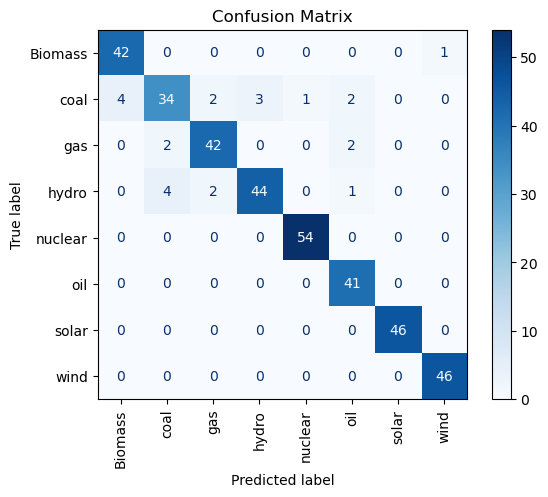

In [135]:
#We have checked that our target column is encoded in this manner
'''
0-Biomass
1-coal
2-gas
3-hydro
4-nuclear
5-oil
6-solar
7-wind

'''
class_labels = ['Biomass', 'coal', 'gas', 'hydro', 'nuclear', 'oil', 'solar', 'wind']

y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.title('Confusion Matrix')
plt.show()

### Saving the Model

In [136]:
joblib.dump(grid_search.best_estimator_,"GPPDIND_primary_fuel.pkl")

['GPPDIND_primary_fuel.pkl']

## END OF THE PROJECT